In [0]:
import pandas as pd
url = "https://data.urbanaillinois.us/resource/afbd-8beq.csv"
df = pd.read_csv(url, delimiter=',')

In [0]:
columns = ['arrestee_sex', 'arrestee_race', 'arrestee_residency_description', 'crime_category_description', 'arrest_resolution']
df = df[columns]
df['arrestee_residency_description'].fillna('UNKNOWN', inplace=True)
df['crime_category_description'].dropna(inplace=True)
df.head(10)

,arrestee_sex,arrestee_race,arrestee_residency_description,crime_category_description,arrest_resolution
0,MALE,HISPANIC,RESIDENT,Battery,TAKEN TO JAIL
1,MALE,ASIAN,RESIDENT,Traffic Offenses,TAKEN TO JAIL
2,MALE,ASIAN,RESIDENT,Driving Under the Influence,TAKEN TO JAIL
3,MALE,ASIAN,RESIDENT,Traffic Offenses,TAKEN TO JAIL
4,MALE,ASIAN,RESIDENT,Driving Under the Influence,TAKEN TO JAIL
5,MALE,ASIAN,RESIDENT,Driving Under the Influence,TAKEN TO JAIL
6,MALE,ASIAN,RESIDENT,Traffic Offenses,TAKEN TO JAIL
7,MALE,BLACK,NON-RESIDENT,Traffic Offenses,TAKEN TO JAIL
8,MALE,BLACK,NON-RESIDENT,Driving Under the Influence,TAKEN TO JAIL
9,MALE,BLACK,RESIDENT,Traffic Offenses,INDIVIDUAL BOND


In [0]:
df['sex'] = df['arrestee_sex'].rank(method='dense', ascending=False).astype(int)
df['race'] = df['arrestee_race'].rank(method='dense', ascending=False).astype(int)
df['residency'] = df['arrestee_residency_description'].rank(method='dense', ascending=False).astype(int)
df['crime'] = df['crime_category_description'].rank(method='dense', ascending=False).astype(int)
df['resolution'] = df['arrest_resolution'].rank(method='dense', ascending=False).astype(int)
df.head(10)

,arrestee_sex,arrestee_race,arrestee_residency_description,crime_category_description,arrest_resolution,sex,race,residency,crime,resolution
0,MALE,HISPANIC,RESIDENT,Battery,TAKEN TO JAIL,1,2,2,34,1
1,MALE,ASIAN,RESIDENT,Traffic Offenses,TAKEN TO JAIL,1,4,2,7,1
2,MALE,ASIAN,RESIDENT,Driving Under the Influence,TAKEN TO JAIL,1,4,2,22,1
3,MALE,ASIAN,RESIDENT,Traffic Offenses,TAKEN TO JAIL,1,4,2,7,1
4,MALE,ASIAN,RESIDENT,Driving Under the Influence,TAKEN TO JAIL,1,4,2,22,1
5,MALE,ASIAN,RESIDENT,Driving Under the Influence,TAKEN TO JAIL,1,4,2,22,1
6,MALE,ASIAN,RESIDENT,Traffic Offenses,TAKEN TO JAIL,1,4,2,7,1
7,MALE,BLACK,NON-RESIDENT,Traffic Offenses,TAKEN TO JAIL,1,3,3,7,1
8,MALE,BLACK,NON-RESIDENT,Driving Under the Influence,TAKEN TO JAIL,1,3,3,22,1
9,MALE,BLACK,RESIDENT,Traffic Offenses,INDIVIDUAL BOND,1,3,2,7,6


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [0]:
label = ['sex','race','residency','crime']
X = df[label]
Y = df['resolution']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [0]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [0]:
print("Accuracy:", metrics.accuracy_score(Y_test, pred))

Accuracy: 0.6266666666666667


In [0]:
feature_imp = pd.Series(model.feature_importances_, index=label)
print(feature_imp)

sex          0.040276
race         0.125602
residency    0.100499
crime        0.733624
dtype: float64


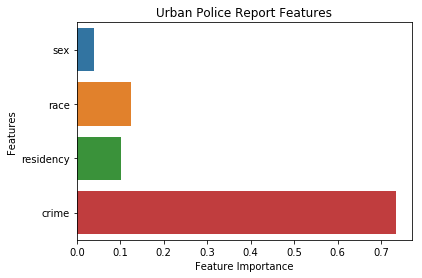

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Urban Police Report Features")
plt.show()